In [92]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [93]:
df_dev  = pd.read_csv("../../dados/ready/dev.csv", sep=",")

In [94]:
df_dev.columns

Index(['loan_id', 'amount', 'duration', 'payments', 'status',
       'acc_age_at_loan', 'is_shared', 'sex', 'age', 'num_inhab',
       'perc_urban_inhab', 'avg_salary', 'enterp_per_1000', 'num_crimes',
       'unemployment', 'unemployment_delta', 'crimes_delta',
       'type_card_classic', 'type_card_gold', 'type_card_junior', 'has_card',
       'min_balance', 'avg_balance', 'max_balance', 'sanctions',
       'negative_balance', 'only_to_na'],
      dtype='object')

In [95]:
def k_means():
    # Use only average balance, unemployment and payments to train the model
    train = df_dev.loc[:,['avg_salary', 'perc_urban_inhab', 'amount']]

    # Declare model
    kmeans = KMeans(n_clusters=4)

    # Fit model
    kmeans.fit(train)
    
    # Predict on the entire data set
    all_pred = kmeans.predict(train)

    X = train

    # Plot the solution
    fig = plt.figure(1, figsize=(12, 12))
    ax = Axes3D(fig, elev=-150, azim=110)
    ax.scatter(
        X.avg_salary,
        X.perc_urban_inhab,
        X.amount,
        c=all_pred,
        cmap=plt.cm.Set1,
        edgecolor='k',
        s=40
    )

    ## Get silluete
    from sklearn import metrics
    silhouette_avg = metrics.silhouette_score(X, all_pred)
    print("For n_clusters =", 4,
            "The average silhouette_score is :", silhouette_avg)


    


    ax.set_title("KMeans")
    ax.set_xlabel("avg_salary")
    ax.set_ylabel("perc_urban_inhab")
    ax.set_zlabel("amount")
    plt.show()

    ## Save as png
    fig.savefig('../../plots/descriptive/kmeans.png')


For n_clusters = 4 The average silhouette_score is : 0.5996978556861681


C:\Users\veris\AppData\Local\Temp\ipykernel_23288\1149437127.py:18: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-150, azim=110)


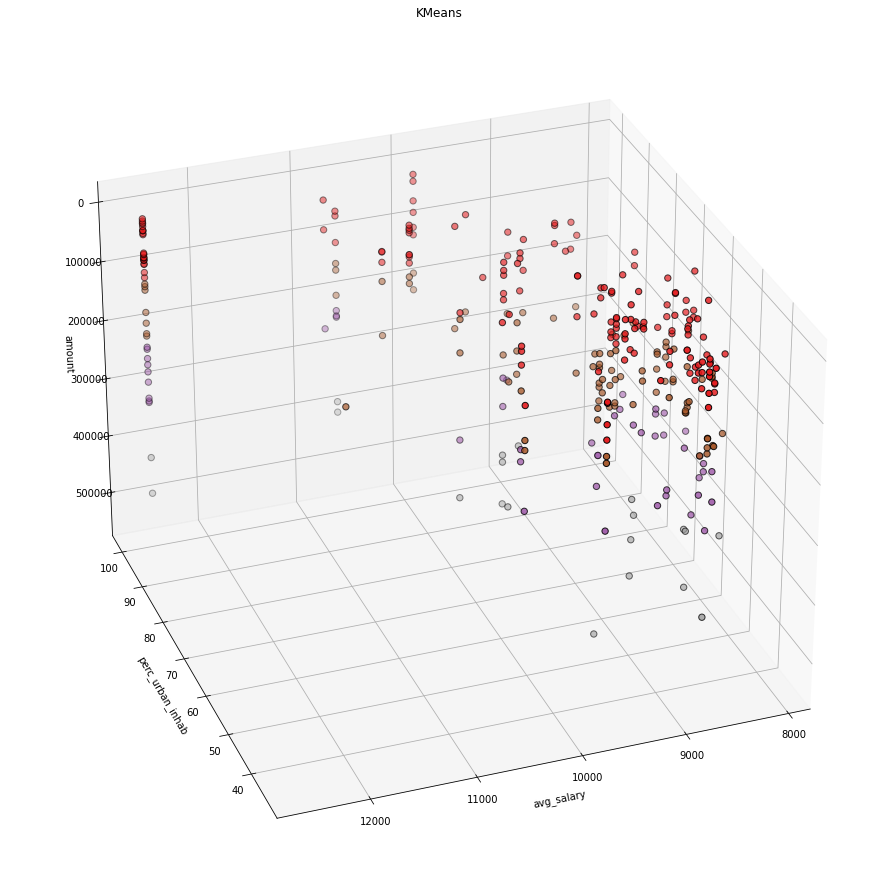

In [96]:
k_means()